# Research Summary 06/20 

## Imports

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

def genPlot(fname,df,l):
    plt.plot(df["time"],df["fidelity"],'o-')
    plt.xlabel("T/Tmin")
    plt.ylabel("Fidelity")
    plt.title(fname)
    plt.grid(which='major', linestyle='-', linewidth='0.5')
    plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
    plt.minorticks_on()
    plt.legend(l)

## Operator Bound Analysis

In [5]:
import numpy as np 
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import eigs
def OpNorm(elevel):
    #Takes in Energy Levels and outputs operator norm of the normalized and non-normalized Ashabb Hamiltonian
    splus = np.zeros([elevel,elevel])
    splusn = np.zeros([elevel,elevel])
    for e in range(elevel-1):
        splus[e,e+1] = np.sqrt(e+1)
        splusn[e,e+1] = 1
    
    H = splus + np.transpose(splus)
    H = np.kron(H,H)
    normH = splusn + np.transpose(splusn)
    normH = np.kron(normH,normH)

    if elevel > 2:
        H = csr_matrix(H)
        normH = csr_matrix(normH)
        [evals,evecs] = eigs(H)
        [evalsn,evecsn] = eigs(normH)
        return [abs(max(evals,key=abs)),abs(max(evalsn,key=abs))]
    else: return [abs(max(np.linalg.eigvals(H),key=abs)),abs(max(np.linalg.eigvals(normH),key=abs))]


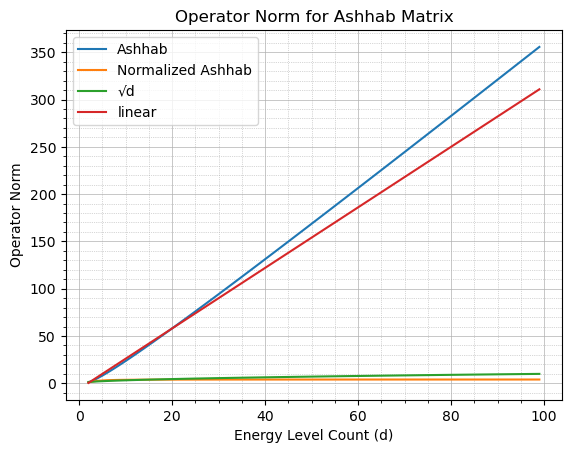

In [7]:
import matplotlib.pyplot as plt
plt.style.use('default')

elevels = np.array([int(i) for i in range(2,100)])
norms = [OpNorm(e) for e in elevels]
roots = [np.sqrt(e) for e in elevels]
squares = [e ** 2 for e in elevels]

plt.plot(elevels,norms)
plt.plot(elevels,roots)
plt.plot(elevels,3.2*elevels - 6)

plt.xlabel("Energy Level Count (d)")
plt.ylabel("Operator Norm")
plt.title("Operator Norm for Ashhab Matrix")
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
plt.minorticks_on()
plt.legend(["Ashhab","Normalized Ashhab","\u221Ad","linear"])
plt.savefig(os.path.join(os.getcwd(),"Figures/","Ashhab_OpNorm.pdf"), format="pdf")

## Ashhab Hopping Hamiltonian

Here we are going to analyzing the speed-up from the Ashhab Hamiltonian with only hopping terms. 

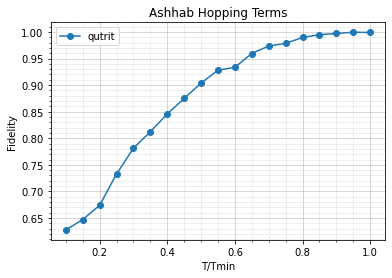

In [2]:
Ashhab_Hopp = pd.read_csv("../ML_Output/Qutrit_CNOT_Ashhab_Hopp_M8_all_g1.0.csv",names=["fidelity","time"])
Ashhab_Hopp.sort_values(by="time",inplace=True)
Ashhab_Hopp = Ashhab_Hopp.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("Ashhab Hopping Terms",Ashhab_Hopp,["qutrit"])

Here we see the hoping terms for the Ashhab Hamiltonian do provide some sort of speed-up. But let's compare this to the traditional Ashhab and different qubit coupling strengths. 

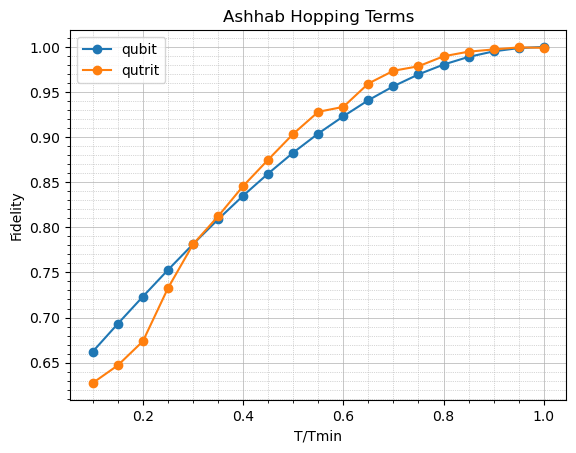

In [15]:
CNOT_PDF = pd.read_csv("../ML_Output/Qutrit_CNOT_CNOT_Protocol_M8_all_g1.csv",names=["fidelity","time"])
CNOT_PDF.sort_values(by="time",inplace=True)
CNOT_PDF = CNOT_PDF.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("CNOT Protocol",CNOT_PDF,["CNOT Protocol"])
genPlot("Ashhab Hopping Terms",Ashhab_Hopp,["qubit","qutrit"])

Here we see that there is little to no speed-up from the hopping terms. This must indicate that the majority of the speed-up is from the constructive interference from the parity two operators $(a_1a_2 + a_1^\dagger a_2^\dagger + \text{h.c.})$ This also indicates that the higher magnitude couplings for higher energy states have little effect on the speed-up of the system, or that our optimization cannot find the optimal solution. 

Testing our optimizer with higher segment counts and only with qutrit drives, we have 

## Full Coupling Hamiltonian

Here we will test if there is a larger speed-up given a coupling matrix with $(d-1)^2$ 

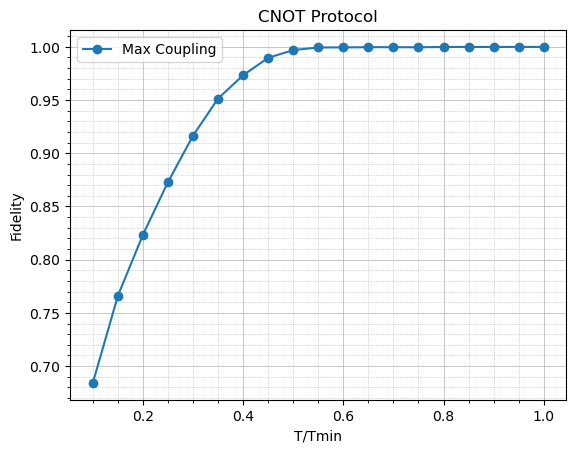

In [11]:
CNOT_32DF = pd.read_csv("../ML_Output/Qutrit_CNOT_Full_M8_all_g1.0.csv",names=["fidelity","time"])
CNOT_32DF.sort_values(by="time",inplace=True)
CNOT_32DF = CNOT_32DF.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("CNOT Protocol",CNOT_32DF,["Max Coupling"])

Here we see if we have a significant speed-up when compared to the baseline qubit case. However, do we achieve an even larger speed-up than our analytical protocol. 

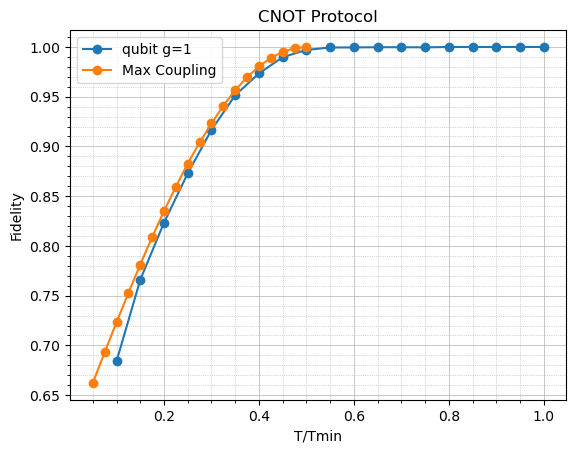

In [16]:
CNOT_PDF2 = CNOT_PDF.copy(deep=True)
CNOT_PDF2["time"] = 1/(2)*CNOT_PDF2["time"]

genPlot("CNOT Protocol",CNOT_32DF,["Max Coupling"])
genPlot("CNOT Protocol",CNOT_PDF2,["qubit g=1","Max Coupling"])

Here we essentially see that our speed-up is on the order of $d-1$ and not $(d-1)^2$. Note that this may be deceptive due to a possible constant factor. While there may exist a $(d-1)^2$ speed-up, the numerics could not find a possible speed-up. 